In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [57]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target
df['flower']=df['target'].apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [58]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

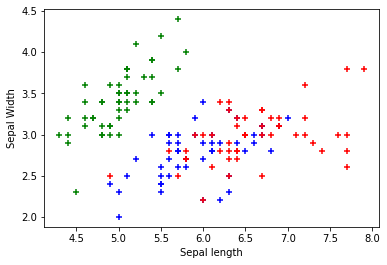

In [59]:
%matplotlib inline
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue", marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='+')

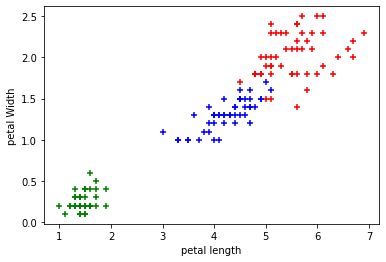

In [60]:
plt.xlabel('petal length')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue", marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red",marker='+')

In [61]:
X=df.drop(['target','flower'], axis=1)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,iris.target, test_size=0.2, random_state=1)

In [63]:
x_test.shape

(30, 4)

Building a KNN (K Nearest Neighbour) Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
knn.score(x_test,y_test)

1.0

finding the best k vlaue

In [72]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors':[i for i in range(1,26)]},
    cv=5, return_train_score=True
    )
clf.fit(iris.data, iris.target)
scores = pd.DataFrame(clf.cv_results_)[['param_n_neighbors','mean_test_score']]
scores

,param_n_neighbors,mean_test_score
0,1,0.960000
1,2,0.946667
2,3,0.966667
3,4,0.973333
4,5,0.973333
5,6,0.980000
6,7,0.980000
7,8,0.966667
8,9,0.973333
9,10,0.980000


Text(0, 0.5, 'test score')

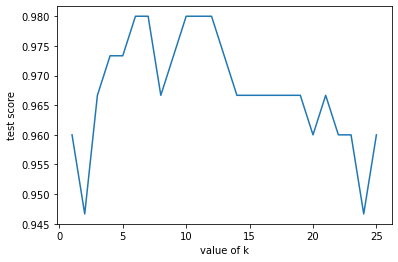

In [73]:
plt.plot(scores.param_n_neighbors, scores.mean_test_score)
plt.xlabel('value of k')
plt.ylabel('test score')

Ploting the Confusion Matrix using Heatmap

In [74]:
y_pred = knn.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(33.0, 0.5, 'Predicted value')

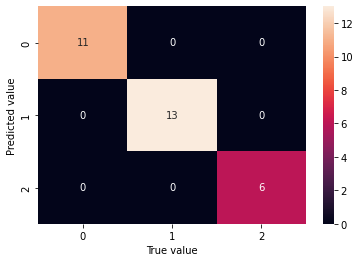

In [76]:
import seaborn as sb
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True)
plt.xlabel('True value')
plt.ylabel('Predicted value')


Printing the Classification Report

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

